In [20]:
import numpy as np
import matplotlib as matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from math import log, sqrt, exp, pi, cos

In [21]:
N = 100000 # muestras aceptadas a obtener
MU = 25
DESV = 2

# como vamos a generar normales(0,1), podemos usar el método de aceptacion y rechazo con una exponencial(1)
def fexp(t):
    return exp(-t)

# usamos funcion densidad normal(0,1), luego transformaremos a N(40,6) mediante la inversa del método de normalización de normales
def fnorm(t):
    return exp(-((t**2)/2))/(sqrt(2*pi))

# el c resultante para generar N(0,1) desde EXP(1)
c = sqrt(2*exp(1)/pi)

# los valores aceptados a guardar
simulated_normal = []
i = 0
necesarios = 0

# como una normal X se estandariza a una Z~N(0,1) con Z=(X-μ)/σ entonces X=Z*σ+μ
while(i < N):
    necesarios += 1
    randexp = np.random.exponential(1)
    rand1 = np.random.uniform()
    rand2 = np.random.uniform()
    
    if(rand1 < (fnorm(randexp) / (c*fexp(randexp)))):
        if(rand2 > 0.5):
            simulated_normal.append(randexp * DESV + MU)
        else:
            simulated_normal.append(-randexp * DESV + MU)
        i += 1
        
print(necesarios, 'números totales generados')
print('100000 aceptados para N(25,4)')
print(necesarios - N, 'rechazados')
print('porcentaje de rechazo', (necesarios - N) / necesarios * 100, '%')

263084 números totales generados
100000 aceptados para N(25,4)
163084 rechazados
porcentaje de rechazo 61.9893266029101 %


[(15, 35)]

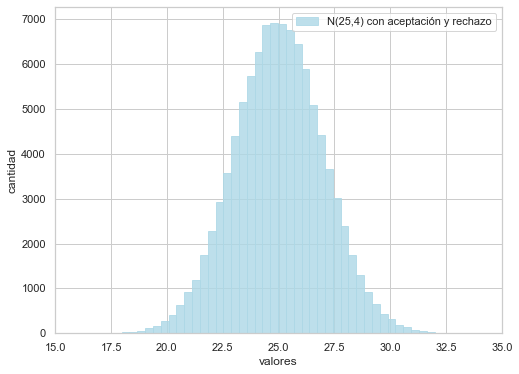

In [22]:
sns.set(rc={'figure.figsize':(8,6)}, style="whitegrid")
plot = sns.distplot(simulated_normal, kde=False, hist_kws={'alpha':0.8, 'edgecolor':'lightblue'}, color="lightblue", label="N(25,4) con aceptación y rechazo")
plt.xlabel('valores')
plt.ylabel('cantidad')
plt.legend()
plot.set(xlim=(15, 35))

In [23]:
python_normal = []

for i in range(0, N):
    python_normal.append(np.random.normal(MU, DESV))

[(15, 35)]

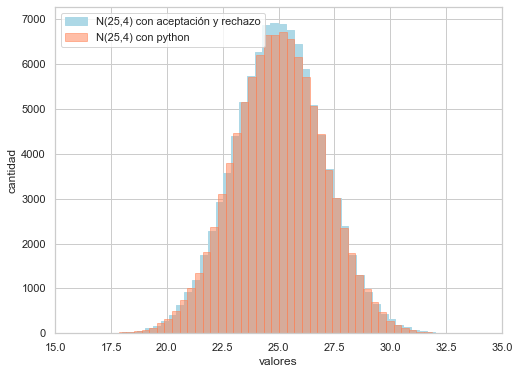

In [24]:
sns.set(rc={'figure.figsize':(8,6)}, style="whitegrid")
sns.distplot(simulated_normal, kde=False, hist_kws={'alpha':1, 'edgecolor':'lightblue'}, color="lightblue", label="N(25,4) con aceptación y rechazo")
plot = sns.distplot(python_normal, kde=False, hist_kws={'alpha':0.5, 'edgecolor':'coral'}, color="coral", label="N(25,4) con python")
plt.xlabel('valores')
plt.ylabel('cantidad')
plt.legend()
plot.set(xlim=(15, 35))

In [25]:
print('N(25,4) con aceptación y rechazo - Esperanza:', np.median(simulated_normal))
print('N(25,4) con aceptación y rechazo - Varianza:', np.var(simulated_normal))

N(25,4) con aceptación y rechazo - Esperanza: 24.99893366013812
N(25,4) con aceptación y rechazo - Varianza: 4.00227103236959
